In [1]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np
import math

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        #return np.random.choice(np.linspace(mu - sigma/math.sqrt(3), mu + sigma/math.sqrt(3), num = n*10),(1,n))[0]
        return np.random.uniform(mu - sigma/math.sqrt(3), mu + sigma/math.sqrt(3), (1,n))[0]
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")

In [2]:
y_test

array([ 0.06070735,  0.02563096, -0.08745117,  0.07381562,  0.09947272])

In [3]:
n, mu, sigma, dist = 105, 0.5, 1.0, "normal"
y1 = generate_random_numbers(n, mu, sigma, dist)

n, mu, sigma, dist = 105, 0.5, 1.0, "uniform"
y2 = generate_random_numbers(n, mu, sigma, dist)

In [4]:
print(y1,y2)

[-0.20959949  1.78866477 -1.95370508 -0.31024941  0.32363851  0.53097082
  1.36543623  0.40392943 -0.43412712  1.39481352 -0.06222214 -0.03144991
  1.99530731  0.81746534  1.06846595 -1.27198282  2.36953322  1.17232639
 -0.65799477  0.65896433  0.04058391 -0.15241135  1.87543368  0.32500992
  2.11125993  0.40946533  0.05098642  0.62607786  0.18591315  0.96565976
 -0.0076397  -0.76522255 -0.74241992  2.01445906 -0.00713037  1.72888064
  2.12935544 -0.83750562  1.67160161 -0.70413807  2.13381128 -0.07245562
  0.6158151  -0.95281738  1.72732599  0.10303889  0.30653293  1.93687747
  2.10070659 -0.63336979 -0.24878729  1.55111301  1.05386704  0.12681072
  1.67772942  0.33339852  0.27112527  1.93921112  0.74248849  2.01757619
 -0.53483166  1.96350829  1.02220562  0.31414353  1.70060515  0.82484509
  1.7375323   1.6963971  -0.44510327  1.41020245  1.11969848  2.51143611
 -0.5019572   2.27724526  1.27081465  0.76115523 -0.44595406  1.80264493
  0.90294745  0.03414775  1.59728796  0.97056054  0

In [5]:
import matplotlib.pyplot as plt

plt.hist(y1, bins = 10)

(array([ 1.,  1., 11., 14., 20., 14., 17., 12., 13.,  2.]),
 array([-1.95370508, -1.46750151, -0.98129793, -0.49509436, -0.00889079,
         0.47731279,  0.96351636,  1.44971993,  1.93592351,  2.42212708,
         2.90833065]),
 <a list of 10 Patch objects>)

0.444627467314407


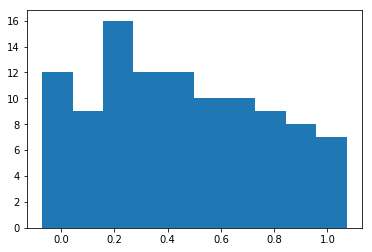

In [6]:
plt.hist(y2, bins=10)
print(np.mean(y2))

In [7]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    alpha = 1
    x = [0]
    k = 0
    for i in ordering:
        k += 1
        x.append(x[-1] - (1/(k+1))*alpha*(x[-1] - y[i]))
    return x


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    alpha = 1
    x = [0]
    k = 0
    for i in ordering:
        k += 1
        x.append(x[-1] - (1/(k+1))*alpha*(x[-1] - y[i]))
    return x

In [8]:
wr1 = IGD_wr_task1(y1)
wo1 = IGD_wo_task1(y1)
wr2 = IGD_wr_task1(y2)
wo2 = IGD_wo_task1(y2)

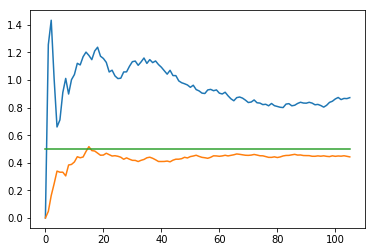

In [9]:
plt.plot(np.arange(n+1),wr1)
plt.plot(np.arange(n+1),wr2)
plt.plot(np.arange(n+1),0.5*np.ones(n+1))

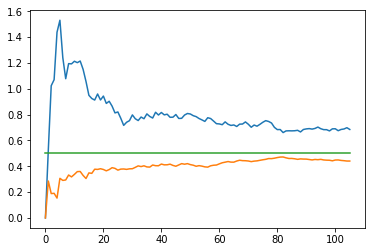

In [10]:
plt.plot(np.arange(n+1),wo1)
plt.plot(np.arange(n+1),wo2)
plt.plot(np.arange(n+1),0.5*np.ones(n+1))